#List of largest companies in the US by revenue...

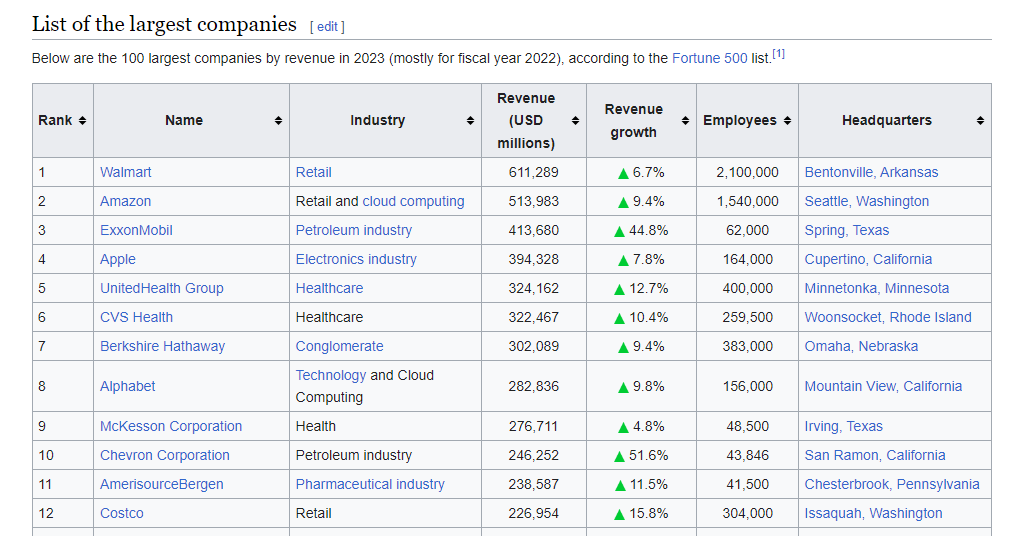

*and so on.....*

*We are going to scrap these data from the given url...*

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.content , 'html.parser')

In [3]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

# Table 0 *(which we don't want at all!!)* XD

class = "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"

# Table 1
class = "wikitable sortable jquery-tablesorter"

# Table 2
class = "wikitable sortable jquery-tablesorter"

# Table 3
class = "wikitable sortable jquery-tablesorter"

*Looks like we have all the tables with the same class!! Not a problem to use #soup.find().*

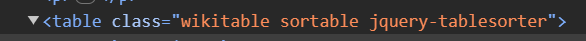

In [4]:
soup.findAll('table')

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Specia

In [5]:
# Since, we are not interested in the table 0, we are gonna pull from table 1....
table1 = soup.findAll('table')[1]
table1

# OR
# table1 = soup.find('table' , class_ = 'wikitable sortable')
# table1

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

Now, we have successfully pulled our first table. In order to get those titles, we'll pull the required headers using 'th' tags as mentioned in the below image.

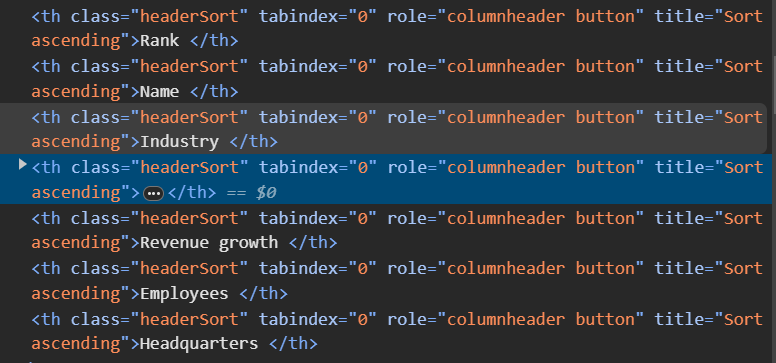

In [6]:
table_headers = table1.findAll('th')
table_headers

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [7]:
world_table_headers = [ith_val.text.replace('\n' , '') for ith_val in table_headers]
world_table_headers

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [8]:
df = pd.DataFrame(columns = world_table_headers)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [9]:
table_rows = table1.findAll('tr')

for data in table_rows[1:]:
  row_data = data.findAll('td')
  individual_data = [data.text.strip() for data in row_data] # or [data.text.replace('\n' , '') for data in row_data]

  length_df = len(df)
  df.loc[length_df] = individual_data

In [10]:
df.index += 1
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
1,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
2,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
3,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
4,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
5,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
96,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
97,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
98,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
99,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [11]:
df.to_csv('Companies.csv' , index = False)